In [1]:
import numpy as np
import pandas as pd

In [2]:
wine = pd.read_csv('C:/Users/d3en/OneDrive/Рабочий стол/dataScience/IDE/skillfactory/EDA-3. Проектирование признаков/data/wine.csv', index_col= 0)

Внешние источники данных — дополнительные источники информации, использующиеся для обогащения датасета. Существует два типа внешних источников данных — открытые и закрытые.

Когда данные получить необходимо, а API у источника данных нет, дата-инженеры прибегают к парсингу. 

Общая внешняя информация — это различные общие географические, экологические, статистические и другие данные. 
географические: население страны, площадь страны, столица страны и так далее.

экологические: среднегодовая температура местности, текущее время года, уровень загрязнения воздуха и так далее.

статистические: доходы населения, половозрастной состав, уровень безработицы и так далее.

Они находятся в открытых источниках: Росстат, Википедия и так далее.

Для доступа к ним применяется парсинг, скачивание и работа с файлами файлов, реже — работа по API.

Профильная внешняя информация — информация, связанная со сферой бизнеса, проблему которого необходимо решить. 

Например, при прогнозировании рейтинга ресторана мы можем использовать ссылки на сайт TripAdvisor для парсинга и получения информации о ресторанах. При рекомендации фильмов в приложении мы можем пользоваться информацией с «Кинопоиска» о фильмах. Также это могут быть запросы в сервисы — запрос в Dadata.ru для проверки действительности адреса. 

Для доступа к такой информации часто применяются запросы по API, парсинг, работа с файлами.

In [3]:
country_population = pd.read_csv('data/country_population.csv', sep=';')

country_population

,country,population
0,China,"1,411,778,724"
1,India,"1,386,584,581"
2,US,"333,022,386"
3,Indonesia,"271,350,000"
4,Pakistan,"225,200,000"
...,...,...
236,Niue,"1,549"
237,Tokelau,"1,501"
238,Vatican City,825
239,Cocos Islands,573


In [4]:
country_population[country_population['country'] == 'Italy']['population']

24    59,097,904
Name: population, dtype: object

Далее сопоставим значения из датасета country_population и страной-производителем вина. На основе значений населения из country_population заполним новый признак country_population.

***Используем для этого функцию для объединения датасетов **join**. Для объединения используем аргумент on='country', указывая столбец, по которому объединяем датафреймы:***

In [5]:
wine_p = wine.join(country_population.set_index('country'), on='country')

In [6]:
wine_p.head()

,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,price_round,year,is_usa,is_france,is_italy,old_wine,locality,population
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,35,2013-01-01,0,0,1,0,Etna,"59,097,904"
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,15,2011-01-01,0,0,0,0,Douro,"10,347,892"
2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,14,2013-01-01,1,0,0,0,Willamette Valley,"333,022,386"
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,13,2013-01-01,1,0,0,0,Lake Michigan Shore,"333,022,386"
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,65,2012-01-01,1,0,0,0,Willamette Valley,"333,022,386"


In [7]:
country_area = pd.read_csv('data/country_area.csv', sep=';')
country_area

,country,area
0,Russia,17075400.00
1,Canada,9984670.00
2,China,9596960.00
3,US,9372610.00
4,Brazil,8547000.00
...,...,...
188,San Marino,61.00
189,Tuvalu,26.00
190,Nauru,21.00
191,Monaco,2.00


In [8]:
wine_a = wine_p.join(country_area.set_index('country'), on='country')
wine_a.head(1)


,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,...,winery,price_round,year,is_usa,is_france,is_italy,old_wine,locality,population,area
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),...,Nicosia,35,2013-01-01,0,0,1,0,Etna,"59,097,904",301230.0


In [9]:
# Какая площадь страны у вина под названием 'Gård 2014 Grand Klasse Reserve Lawrence Vineyards Viognier (Columbia Valley (WA))'? 
# Ответ вводите без пробелов, округлите до целых.
mask = wine_a['title'] == 'Gård 2014 Grand Klasse Reserve Lawrence Vineyards Viognier (Columbia Valley (WA))'
wine_a[mask]['area']

94    9372610.0
Name: area, dtype: float64

Создайте признак количество дней с момента произведения вина — years_diff для датасета винных обзоров. За дату отсчёта возьмите 12 января 2022 года. В ответ впишите максимальное количество дней с момента произведения вина. Ответ округлите до целого числа.

In [10]:
wine_a['year'] = pd.to_datetime(wine_a['year'])
wine_a['years_diff'] = (pd.to_datetime('2022, 1, 12') - wine_a['year']).dt.days
wine_a['years_diff'].max()

98627.0

In [11]:
wine_a.head()

,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,...,price_round,year,is_usa,is_france,is_italy,old_wine,locality,population,area,years_diff
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),...,35,2013-01-01,0,0,1,0,Etna,"59,097,904",301230.0,3298.0
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),...,15,2011-01-01,0,0,0,0,Douro,"10,347,892",92391.0,4029.0
2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),...,14,2013-01-01,1,0,0,0,Willamette Valley,"333,022,386",9372610.0,3298.0
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,St. Julian 2013 Reserve Late Harvest Riesling ...,...,13,2013-01-01,1,0,0,0,Lake Michigan Shore,"333,022,386",9372610.0,3298.0
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,...,65,2012-01-01,1,0,0,0,Willamette Valley,"333,022,386",9372610.0,3664.0


### <center> ПОРЯДКОВОЕ КОДИРОВАНИЕ. ORDINAL ENCODING

In [12]:
#Используйте ранее изученные методы кодирования и закодируйте признак year в датасете винных обзоров порядковым кодированием.
import category_encoders as ce

ord_encoder = ce.OrdinalEncoder()
data_bin = ord_encoder.fit_transform(wine_a[['year']].astype(object))
data_bin.rename(columns={'year': 'year_encoder'}, inplace= True)
wine_a = pd.concat([wine_a, data_bin], axis=1)


wine_a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129972 entries, 0 to 129970
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   country                129909 non-null  object        
 1   description            129972 non-null  object        
 2   designation            129972 non-null  object        
 3   points                 129972 non-null  int64         
 4   price                  129972 non-null  float64       
 5   province               129909 non-null  object        
 6   region_1               129972 non-null  object        
 7   taster_name            129972 non-null  object        
 8   taster_twitter_handle  129972 non-null  object        
 9   title                  129972 non-null  object        
 10  variety                129971 non-null  object        
 11  winery                 129972 non-null  object        
 12  price_round            129972 non-null  int6

### <center> ОДНОКРАТНОЕ КОДИРОВАНИЕ. ONE-HOT ENCODING

In [13]:
#В нашем наборе данных винных обзоров признак, обозначающий имя сомелье (taster_name), является номинальным. Закодируйте его, используя One-Hot Encoding.

encoder = ce.OneHotEncoder(cols=['taster_name']) # указываем столбец для кодирования
type_bin = encoder.fit_transform(wine_a['taster_name'])
wine_a = pd.concat([wine_a, type_bin], axis=1)

wine_a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129972 entries, 0 to 129970
Data columns (total 43 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   country                129909 non-null  object        
 1   description            129972 non-null  object        
 2   designation            129972 non-null  object        
 3   points                 129972 non-null  int64         
 4   price                  129972 non-null  float64       
 5   province               129909 non-null  object        
 6   region_1               129972 non-null  object        
 7   taster_name            129972 non-null  object        
 8   taster_twitter_handle  129972 non-null  object        
 9   title                  129972 non-null  object        
 10  variety                129971 non-null  object        
 11  winery                 129972 non-null  object        
 12  price_round            129972 non-null  int6

Закодируйте признак country двоичным способом.

Сколько новых признаков образовалось после кодирования признака country?

### <center> ДВОИЧНОЕ КОДИРОВАНИЕ

In [14]:
bin_encoder = ce.BinaryEncoder(cols=['country']) # указываем столбец для кодирования
country_bin  = bin_encoder.fit_transform(wine_a['country'])
wine_a = pd.concat([wine_a, country_bin ], axis=1)

wine_a.head()

,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,...,taster_name_17,taster_name_18,taster_name_19,taster_name_20,country_0,country_1,country_2,country_3,country_4,country_5
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),...,0,0,0,0,0,0,0,0,0,1
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),...,0,0,0,0,0,0,0,0,1,0
2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),...,0,0,0,0,0,0,0,0,1,1
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,St. Julian 2013 Reserve Late Harvest Riesling ...,...,0,0,0,0,0,0,0,0,1,1
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,...,0,0,0,0,0,0,0,0,1,1


In [15]:
wine_a['taster_twitter_handle'].describe()

count      129972
unique         16
top       unknown
freq        31213
Name: taster_twitter_handle, dtype: object

In [16]:
# На основе изученного материала определите подходящий способ кодирования признака taster_twitter_handle из датасета винных обзоров и закодируйте его.

# В ответе напишите, сколько признаков добавилось после применения кодирования.

bin_encoder = ce.BinaryEncoder(cols=['taster_twitter_handle']) # указываем столбец для кодирования
type_bin = bin_encoder.fit_transform(wine_a['taster_twitter_handle'])
wine_a = pd.concat([wine_a, type_bin], axis=1)

wine_a.head(1)

,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,...,country_1,country_2,country_3,country_4,country_5,taster_twitter_handle_0,taster_twitter_handle_1,taster_twitter_handle_2,taster_twitter_handle_3,taster_twitter_handle_4
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),...,0,0,0,0,1,0,0,0,0,1


### <center> ROBUSTSCALER

In [17]:
# В нашем датасете винных обзоров много бинарных признаков, принимающих значение 0 или 1. Давайте нормализуем признак price в диапазон значений от 0 до 1.
# Нормализуйте признак price. Используйте подходящий тип нормализации.
# from sklearn import preprocessing

# # инициализируем нормализатор RobustScaler
# scaler = preprocessing.RobustScaler()

# # Применяем метод к выбранному столбцу

# wine_a['price'] = scaler.fit_transform(wine_a[['price']])

In [18]:
# Результат округляем до целого
# round(wine_a['price'].sum())

### <center> STANDARDSCALER

In [19]:
# Стандартизируйте исходный признак price.

# В ответе напишите результат выполнения кода data['price'][129968]. Ответ округлите до сотых.
# Для этого закоментируем предыдушее преобразование признака price

from sklearn import preprocessing
# инициализируем стандартизатор StandardScaler
s_scaler = preprocessing.StandardScaler()
wine_a['price'] = s_scaler.fit_transform(wine_a[['price']])



In [20]:
round(wine_a['price'][129968], 2)

-0.14

### <center> ОТБОР ПРИЗДНАКОВ

<AxesSubplot:>

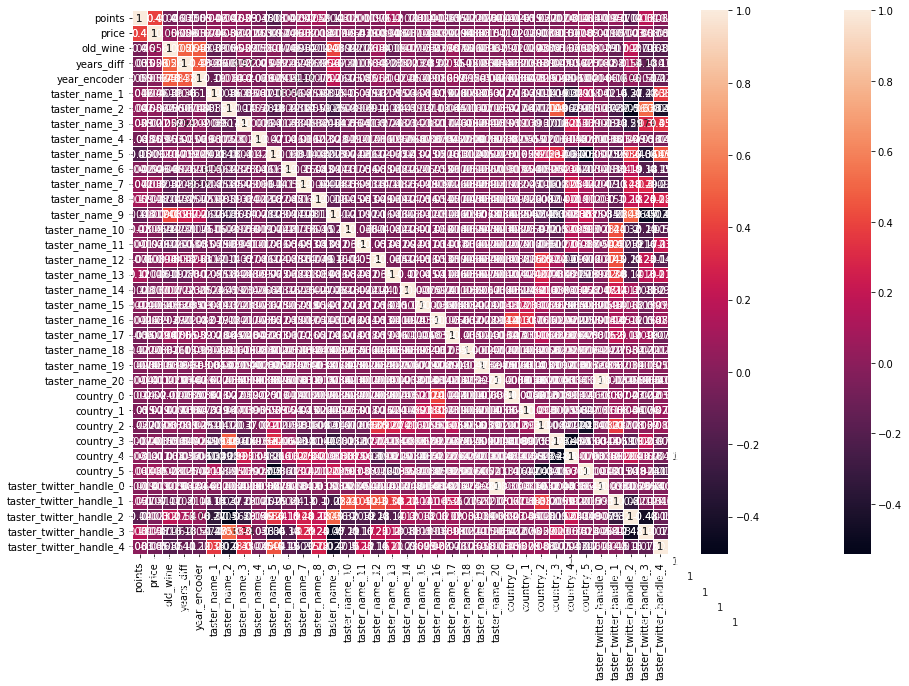

In [27]:
# Построим график корреляции всех величин. Для простоты воспользуемся корреляцией Пирсона.

# работа с визуализацией
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(wine_a.corr(), annot=True, linewidths=.5, ax=ax)

# # Удалим самые сильно скоррелированные пары
wine_a = wine_a.drop(['is_usa', 'is_france', 'is_italy', 'price_round', 'area'], axis=1)

# Проверяем, что сильно скоррелированных признаков не осталось
sns.heatmap(wine_a.corr(), annot=True, linewidths=.5, ax=ax)

In [22]:
# # Какие из признаков имеют самую сильную корреляционную связь?
# import seaborn as sns
# sns.heatmap(wine_a.corr(), annot=True)


In [28]:
# round(wine_a.corr(), 2)
# # price и price_round

,points,price,old_wine,years_diff,year_encoder,taster_name_1,taster_name_2,taster_name_3,taster_name_4,taster_name_5,...,country_1,country_2,country_3,country_4,country_5,taster_twitter_handle_0,taster_twitter_handle_1,taster_twitter_handle_2,taster_twitter_handle_3,taster_twitter_handle_4
points,1.00,0.40,-0.05,-0.03,-0.05,0.04,0.04,0.06,-0.05,-0.18,...,-0.02,-0.04,-0.02,0.03,0.06,-0.00,0.05,-0.14,0.18,0.03
price,0.40,1.00,0.06,0.05,0.01,0.05,0.03,-0.01,-0.01,-0.09,...,-0.02,-0.07,0.00,-0.02,0.09,-0.00,-0.05,-0.02,0.06,-0.06
old_wine,-0.05,0.06,1.00,0.50,0.48,-0.12,-0.09,0.06,-0.04,0.03,...,-0.02,0.04,-0.06,-0.04,0.03,0.00,-0.11,0.20,-0.16,-0.17
years_diff,-0.03,0.05,0.50,1.00,0.47,-0.05,-0.06,0.02,-0.02,0.02,...,-0.01,0.01,-0.05,-0.04,0.03,0.00,-0.08,0.13,-0.13,-0.11
year_encoder,-0.05,0.01,0.48,0.47,1.00,-0.11,0.01,0.02,-0.03,-0.00,...,-0.01,0.03,0.02,-0.06,-0.00,0.01,-0.02,0.06,-0.04,-0.11
taster_name_1,0.04,0.05,-0.12,-0.05,-0.11,1.00,-0.15,-0.08,-0.02,-0.11,...,-0.03,-0.11,-0.19,-0.34,0.15,-0.00,-0.14,-0.31,-0.28,0.38
taster_name_2,0.04,0.03,-0.09,-0.06,0.01,-0.15,1.00,-0.14,-0.03,-0.18,...,-0.05,-0.11,0.48,-0.29,-0.09,-0.00,-0.22,-0.50,0.53,-0.40
taster_name_3,0.06,-0.01,0.06,0.02,0.02,-0.08,-0.14,1.00,-0.02,-0.10,...,0.03,-0.10,-0.18,0.25,0.12,-0.00,-0.13,-0.29,0.30,0.35
taster_name_4,-0.05,-0.01,-0.04,-0.02,-0.03,-0.02,-0.03,-0.02,1.00,-0.02,...,-0.01,-0.02,-0.04,0.05,0.03,-0.00,-0.03,0.06,-0.05,-0.05
taster_name_5,-0.18,-0.09,0.03,0.02,-0.00,-0.11,-0.18,-0.10,-0.02,1.00,...,0.02,0.21,0.32,-0.21,-0.50,-0.00,-0.16,0.36,-0.34,0.45


In [24]:
# import plotly
# import plotly.express as px
# px.imshow(wine_a.corr())

In [25]:
# wine_a = wine_a.drop(['is_usa', 'is_france', 'is_italy', 'price_round', 'area', 'taster_twitter_handle_0'], axis=1)

In [26]:
# px.imshow(wine_a.corr())